In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [20]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [59]:
df = pd.read_csv(r'C:\Users\NishchaySingla\DL\PyTorch\fashion-mnist_train2.csv')

In [60]:
df.head(1)
## This data contains flattened images 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.shape

(60000, 785)

In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


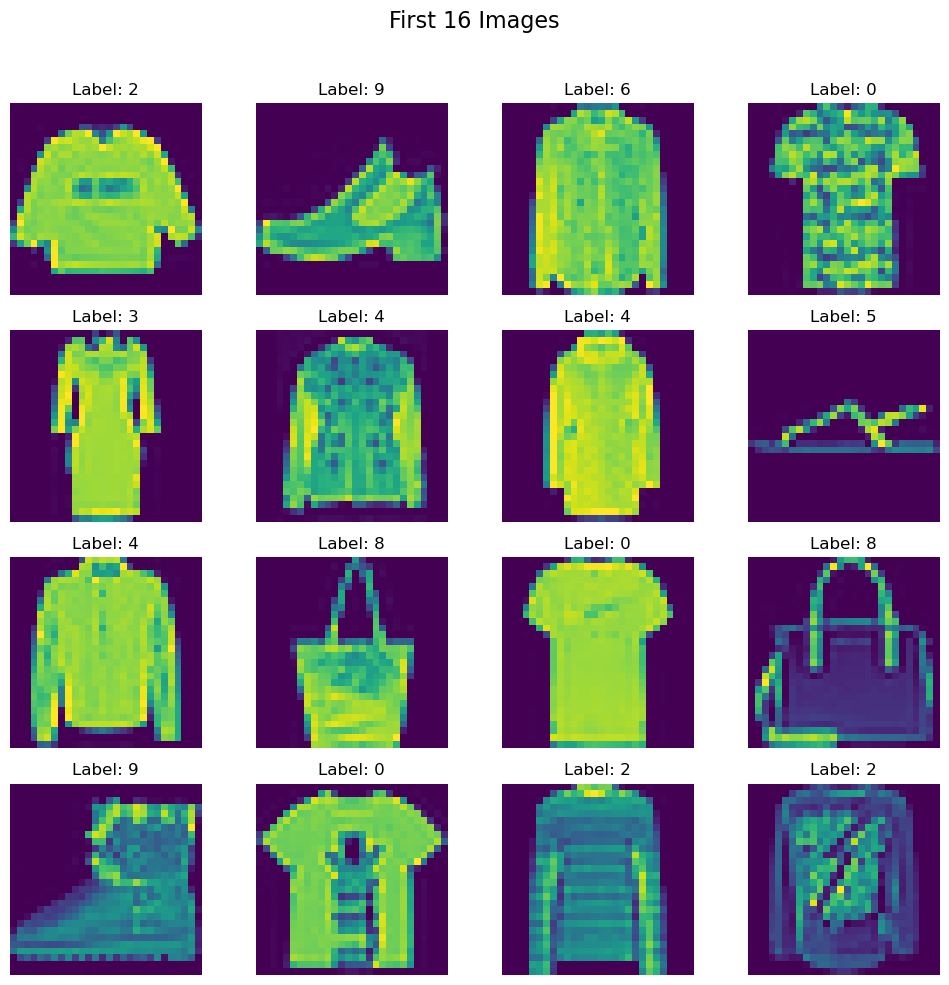

In [62]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [63]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
(df.iloc[:,1:].max()).max()

255

In [65]:
# Min_Max Scaling
X_train = X_train/255.0
X_test = X_test/255.0

In [67]:
X_train,X_train.shape

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
         0.        ]]),
 (48000, 784))

In [68]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long) 

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [69]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [70]:
len(train_dataset)

48000

In [71]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [72]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [78]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)
## We keep shuffle = False in test_loader to stop shuffling to get correct accuracy 
## calculation

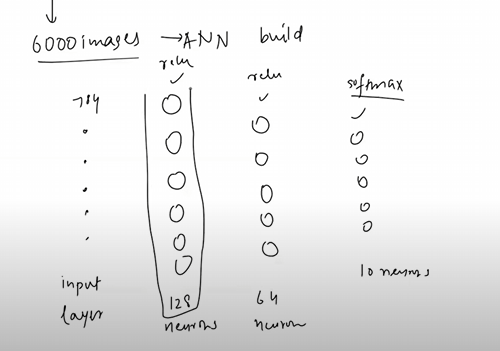

In [79]:
# define NN class for the architecture as shown in the image above

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )
    ## There is no need to add Softmax activation in the end as it is integrated into the 
    ## loss function if we use torch
    
  def forward(self, x):

    return self.model(x)

In [80]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [82]:
# instatiate the model
model = MyNN(X_train.shape[1])
model = model.to(device)

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [83]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.6409445862174035
Epoch: 2 , Loss: 0.4330762717227141
Epoch: 3 , Loss: 0.38869988498091695
Epoch: 4 , Loss: 0.35879824982583525
Epoch: 5 , Loss: 0.3394807760864496
Epoch: 6 , Loss: 0.3222699848264456
Epoch: 7 , Loss: 0.3067202959532539
Epoch: 8 , Loss: 0.29517761852716407
Epoch: 9 , Loss: 0.2840559419815739
Epoch: 10 , Loss: 0.27407913191864886
Epoch: 11 , Loss: 0.26578064464777706
Epoch: 12 , Loss: 0.2559134826262792
Epoch: 13 , Loss: 0.2511027538379033
Epoch: 14 , Loss: 0.24362419671192764
Epoch: 15 , Loss: 0.23765969410290322
Epoch: 16 , Loss: 0.23118939869105815
Epoch: 17 , Loss: 0.2262414196220537
Epoch: 18 , Loss: 0.2204446107322971
Epoch: 19 , Loss: 0.2123294266797602
Epoch: 20 , Loss: 0.2107555062038203
Epoch: 21 , Loss: 0.2070455302745104
Epoch: 22 , Loss: 0.200436191106836
Epoch: 23 , Loss: 0.19675967517246803
Epoch: 24 , Loss: 0.19047722578172882
Epoch: 25 , Loss: 0.18776233741703133
Epoch: 26 , Loss: 0.18661775948666037
Epoch: 27 , Loss: 0.1801709945599238

In [ ]:
## Time taken on CPU - 2m 21s
## Time taken on GPU - 2m 20s
torch.__version__

'2.7.0+cu118'

In [39]:
torch.cuda.is_available()

True

In [84]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [85]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8821666666666667
